<a href="https://colab.research.google.com/github/tanmayb104/Social_And_Information_Network_Project/blob/main/SIN_project_final_review3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     \ 133.1 MB 5.2 MB/s
     |████████████████████████████████| 6.3 MB 4.9 MB/s 
     |████████████████████████████████| 219 kB 70.1 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759600 sha256=d094271f35f7ea22d48513e819d6ed4304f10344130f61e8cccb608de7d9fa07
  Stored in directory: /tmp/pip-ephem-wheel-cache-hzybhkpw/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statistics as stat
# from mpl_toolkits.basemap import Basemap

In [ ]:
airlines = pd.read_csv("sample_data/airlines.csv")
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [ ]:
airports = pd.read_csv("sample_data/airports-extended.csv", names=["Airport ID", "Airport Name", "City", "Country", "IATA", "ICAO", "Latitude", "Longitude", "Altitude", "Timezone", "DST", "Tz database", "Type", "Source"])
airports.head()

,Airport ID,Airport Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [ ]:
routes = pd.read_csv("sample_data/routes.csv")
routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [ ]:
routes.drop_duplicates(subset=["Source airport", "Destination airport"] ,keep = False, inplace = True)
routes_graph = nx.from_pandas_edgelist(routes, source="Source airport", target="Destination airport")

In [ ]:
nx.info(routes_graph)

'Graph with 3152 nodes and 11150 edges'

In [ ]:
routes_graph.nodes()

NodeView(('AER', 'KZN', 'ASF', 'MRV', 'CEK', 'DME', 'NBC', 'TGK', 'UUA', 'EGO', 'KGD', 'GYD', 'SVX', 'LED', 'BTK', 'IKT', 'OVB', 'KCK', 'PCL', 'TPP', 'ABJ', 'BOY', 'ACC', 'OUA', 'COO', 'DKR', 'BOD', 'ZRH', 'BRS', 'GVA', 'LPA', 'ARN', 'HAD', 'JKG', 'KSD', 'MHQ', 'OER', 'POR', 'TRF', 'VXO', 'KOK', 'TKU', 'OSL', 'ADQ', 'AOS', 'KKB', 'KLN', 'KZB', 'SYB', 'KYK', 'KOZ', 'ORI', 'KPR', 'BSB', 'OPS', 'CAC', 'GRU', 'CGR', 'DOU', 'GIG', 'RAO', 'UBA', 'VDC', 'UDI', 'BRL', 'ORD', 'STL', 'DEC', 'JBR', 'CGA', 'HYL', 'KTB', 'KTN', 'DLA', 'LOS', 'FNA', 'LGW', 'ROB', 'AKV', 'YIK', 'YPX', 'XGR', 'YVP', 'YGL', 'YGW', 'YUL', 'YPH', 'YSK', 'YUD', 'YUY', 'YZG', 'YKG', 'YPJ', 'YQC', 'YKL', 'YQB', 'YZV', 'YTQ', 'YWB', 'JIB', 'JED', 'MGQ', 'NBO', 'HGH', 'SIN', 'SWA', 'ACH', 'EBA', 'DRS', 'DUS', 'FDH', 'MUC', 'HAM', 'OLB', 'TXL', 'ZAD', 'FMM', 'NAP', 'GRZ', 'SZG', 'ATL', 'LWB', 'MCN', 'MEI', 'MSL', 'PIB', 'TUP', 'GLH', 'MCO', 'BGY', 'CMN', 'CUF', 'MPL', 'SAW', 'TSF', 'FEZ', 'TNG', 'NDR', 'PMI', 'AUA', 'LSP', 'PT

In [ ]:
routes_graph.edges()

EdgeView([('AER', 'KZN'), ('AER', 'DYU'), ('AER', 'KIV'), ('AER', 'MSQ'), ('AER', 'TZX'), ('AER', 'LED'), ('AER', 'OMS'), ('AER', 'SVO'), ('AER', 'VKO'), ('AER', 'KJA'), ('AER', 'NSK'), ('KZN', 'ASF'), ('KZN', 'CEK'), ('KZN', 'EGO'), ('KZN', 'SVX'), ('KZN', 'AYT'), ('KZN', 'DWC'), ('KZN', 'SHJ'), ('KZN', 'FEG'), ('KZN', 'SKD'), ('KZN', 'TAS'), ('KZN', 'ALA'), ('KZN', 'SVO'), ('KZN', 'IST'), ('KZN', 'UFA'), ('KZN', 'FRU'), ('KZN', 'OSS'), ('ASF', 'MRV'), ('ASF', 'LED'), ('ASF', 'SCO'), ('ASF', 'SVO'), ('ASF', 'SAW'), ('MRV', 'RTW'), ('MRV', 'SAW'), ('MRV', 'SCO'), ('MRV', 'GYD'), ('MRV', 'TLV'), ('MRV', 'EVN'), ('MRV', 'LED'), ('MRV', 'SVO'), ('MRV', 'DWC'), ('MRV', 'DYU'), ('MRV', 'VKO'), ('CEK', 'FRU'), ('CEK', 'EVN'), ('CEK', 'LED'), ('CEK', 'SVO'), ('CEK', 'DWC'), ('CEK', 'NMA'), ('CEK', 'TAS'), ('DME', 'NBC'), ('DME', 'TGK'), ('DME', 'UUA'), ('DME', 'MJZ'), ('DME', 'PYJ'), ('DME', 'RTW'), ('DME', 'CSY'), ('DME', 'ESL'), ('DME', 'GRV'), ('DME', 'MCX'), ('DME', 'PES'), ('DME', 'PEZ')

In [ ]:
nx.degree(routes_graph)

DegreeView({'AER': 11, 'KZN': 17, 'ASF': 6, 'MRV': 12, 'CEK': 8, 'DME': 102, 'NBC': 7, 'TGK': 1, 'UUA': 2, 'EGO': 8, 'KGD': 6, 'GYD': 17, 'SVX': 43, 'LED': 61, 'BTK': 4, 'IKT': 19, 'OVB': 33, 'KCK': 1, 'PCL': 1, 'TPP': 1, 'ABJ': 11, 'BOY': 2, 'ACC': 21, 'OUA': 10, 'COO': 10, 'DKR': 15, 'BOD': 34, 'ZRH': 60, 'BRS': 56, 'GVA': 61, 'LPA': 43, 'ARN': 64, 'HAD': 2, 'JKG': 2, 'KSD': 2, 'MHQ': 2, 'OER': 1, 'POR': 3, 'TRF': 24, 'VXO': 4, 'KOK': 1, 'TKU': 6, 'OSL': 51, 'ADQ': 7, 'AOS': 2, 'KKB': 2, 'KLN': 2, 'KZB': 1, 'SYB': 2, 'KYK': 1, 'KOZ': 2, 'ORI': 2, 'KPR': 1, 'BSB': 14, 'OPS': 1, 'CAC': 3, 'GRU': 37, 'CGR': 6, 'DOU': 3, 'GIG': 22, 'RAO': 7, 'UBA': 4, 'VDC': 3, 'UDI': 4, 'BRL': 2, 'ORD': 61, 'STL': 32, 'DEC': 2, 'JBR': 1, 'CGA': 3, 'HYL': 1, 'KTB': 2, 'KTN': 10, 'DLA': 11, 'LOS': 36, 'FNA': 6, 'LGW': 88, 'ROB': 3, 'AKV': 2, 'YIK': 2, 'YPX': 4, 'XGR': 1, 'YVP': 10, 'YGL': 3, 'YGW': 8, 'YUL': 48, 'YPH': 4, 'YSK': 3, 'YUD': 3, 'YUY': 1, 'YZG': 2, 'YKG': 3, 'YPJ': 3, 'YQC': 2, 'YKL': 3, 'YQB

In [ ]:
#Finding out the basic characteristics of the Graph.
g_nodes = nx.number_of_nodes(routes_graph)
g_edges = nx.number_of_edges(routes_graph)
g_density = nx.density(routes_graph)
g_number_of_connected_components = nx.number_connected_components(routes_graph)
g_connected_components = nx.connected_components(routes_graph)
degrees = [v for k, v in routes_graph.degree()]
minimum = min(degrees)
maximum = max(degrees)
avg = stat.mean(degrees)
stdev = stat.stdev(degrees)
#Printing the basics of graph
print("Number of nodes : ",g_nodes)
print("Number of edges : ",g_edges)
print("Density : ",g_density)
print("Number of Connected components : ",g_number_of_connected_components)
print("Minimum Degree: ",minimum)
print("Maximum Degree: ",maximum)
print("Average Degree: ",avg)
print("Standard Deviation: ",stdev)

Number of nodes :  3152
Number of edges :  11150
Density :  0.0022452786723093305
Number of Connected components :  30
Minimum Degree:  1
Maximum Degree:  139
Average Degree:  7.074873096446701
Standard Deviation:  12.716576092066298


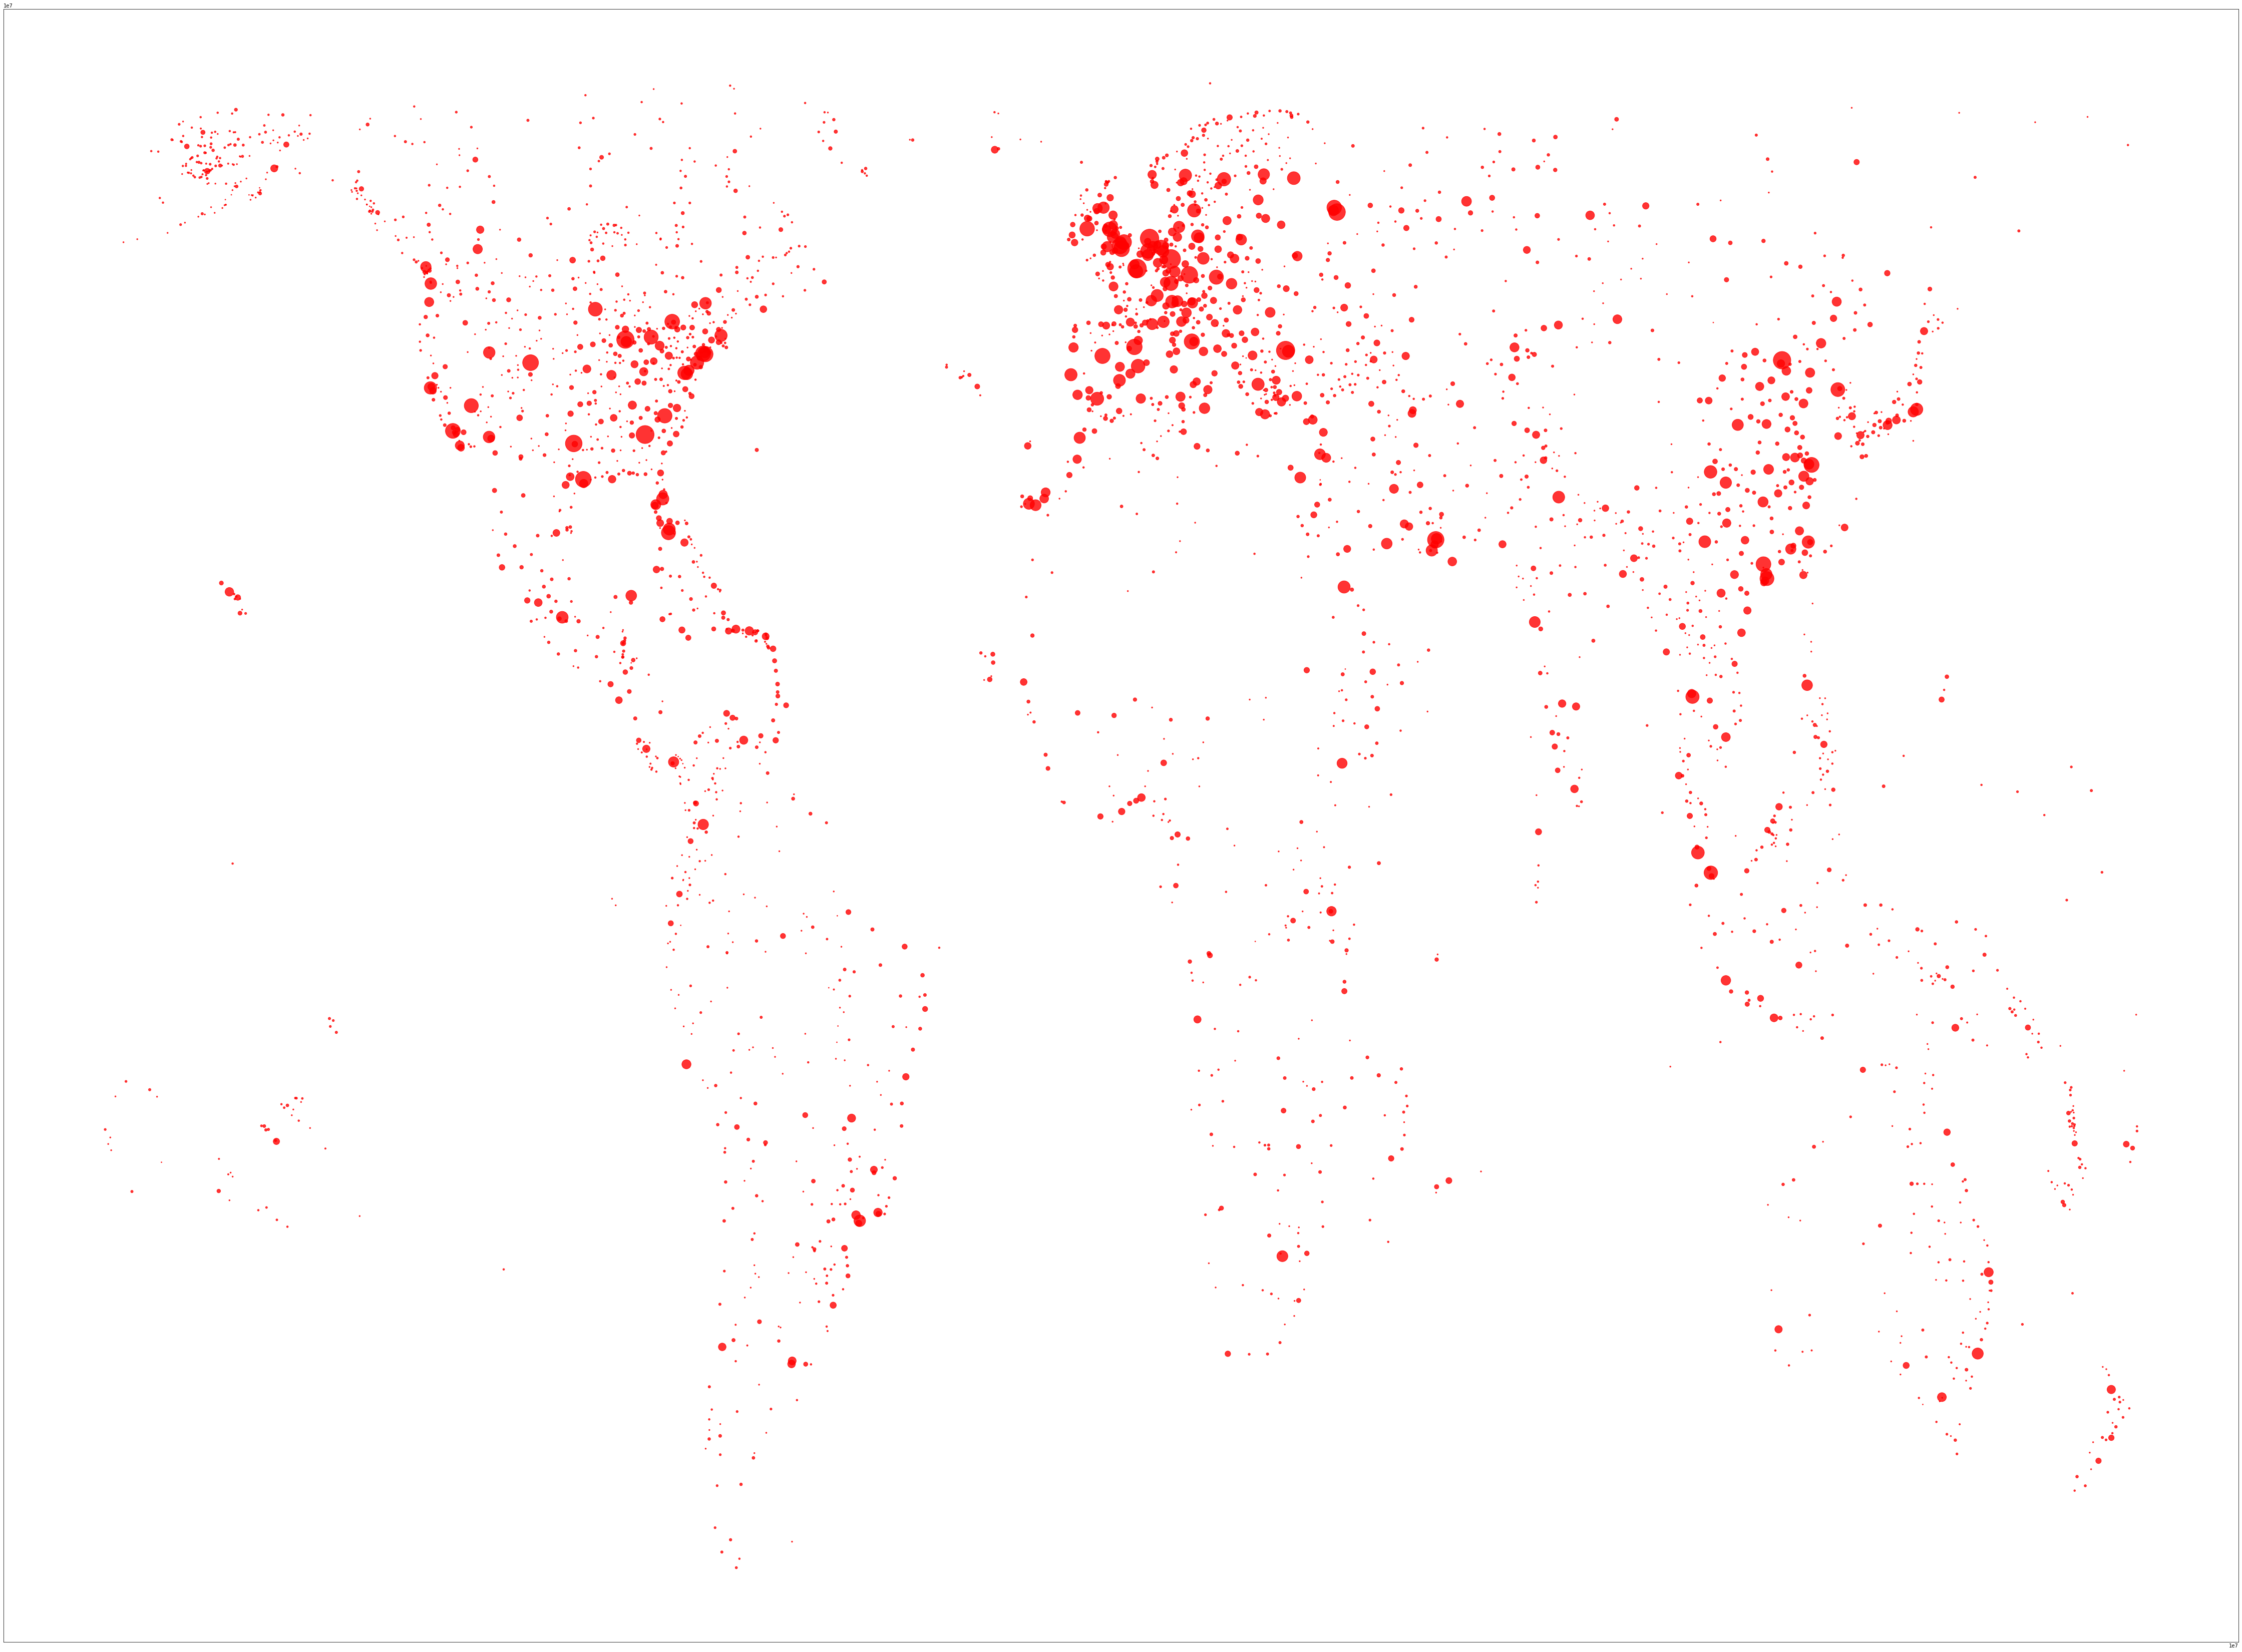

In [ ]:
routes['Source airport ID'] = pd.to_numeric(routes['Source airport ID'].astype(str), 'coerce')
routes['Destination airport ID'] = pd.to_numeric(routes['Destination airport ID'].astype(str), 'coerce')
routes = routes.dropna(subset=["Source airport ID", "Destination airport ID"])
airport_new = airports[['Airport Name','Latitude', 'Longitude', 'IATA', 'ICAO']]
airport_indexs = airport_new.index.values
routes_new = routes[(routes['Source airport ID'].isin(airport_indexs)) &
		                     (routes['Destination airport ID'].isin(airport_indexs))]
routes_new =  pd.DataFrame(routes_new.groupby(['Source airport', 'Destination airport']).size().reset_index(name='counts'))
routes_counts = routes_new['Source airport'].append(routes_new.loc[routes_new['Source airport'] != routes_new['Destination airport'], 'Destination airport']).value_counts()
routes_counts = pd.DataFrame({'IATA': routes_counts.index, 'total_flight': routes_counts})
pos_data = routes_counts.merge(airport_new, on = 'IATA')
graph_new = nx.from_pandas_edgelist(routes_new, source = 'Source airport', target = 'Destination airport', edge_attr = 'counts',create_using = nx.DiGraph())
fig = plt.figure(figsize=(80, 60), edgecolor='w')
m = Basemap(projection='cea',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c',suppress_ticks = True)
mx, my = m(pos_data['Longitude'].values, pos_data['Latitude'].values)
pos = {}
for count, elem in enumerate (pos_data['IATA']):
  pos[elem] = (mx[count], my[count])
nx.draw_networkx_nodes(G = graph_new, pos = pos, nodelist = graph_new.nodes(), node_color = 'r', alpha = 0.8, node_size = [routes_counts['total_flight'][s]*3 for s in graph_new.nodes()])

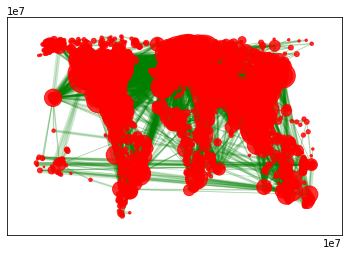

In [ ]:
nx.draw_networkx_nodes(G = graph_new, pos = pos, nodelist = graph_new.nodes(), node_color = 'r', alpha = 0.8, node_size = [routes_counts['total_flight'][s]*3 for s in graph_new.nodes()])
nx.draw_networkx_edges(G = graph_new, pos = pos, edge_color='g', width = routes_new['counts']*0.75, 
		                       alpha=0.2, arrows = False)

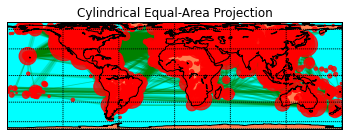

In [ ]:
nx.draw_networkx_nodes(G = graph_new, pos = pos, nodelist = graph_new.nodes(), node_color = 'r', alpha = 0.8, node_size = [routes_counts['total_flight'][s]*3 for s in graph_new.nodes()])
nx.draw_networkx_edges(G = graph_new, pos = pos, edge_color='g', width = routes_new['counts']*0.75, alpha=0.2, arrows = False)
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
plt.title("Cylindrical Equal-Area Projection")
plt.show()

In [ ]:
hubs_dict = nx.degree_centrality(routes_graph)
top10hubs = {k: hubs_dict[k] for k in list(hubs_dict)[:10]}
print("\nThe top 10 hubs are: ")
for i in top10hubs:
  print(i)



The top 10 hubs are: 
AER 2821    Sochi International Airport
Name: Airport Name, dtype: object
KZN 2843    Kazan International Airport
Name: Airport Name, dtype: object
ASF 2822    Astrakhan Airport
Name: Airport Name, dtype: object
MRV 2818    Mineralnyye Vody Airport
Name: Airport Name, dtype: object
CEK 2824    Chelyabinsk Balandino Airport
Name: Airport Name, dtype: object
DME 3830    Domodedovo International Airport
Name: Airport Name, dtype: object
NBC 5537    Begishevo Airport
Name: Airport Name, dtype: object
TGK Series([], Name: Airport Name, dtype: object)
UUA 4925    Bugulma Airport
Name: Airport Name, dtype: object
EGO 4921    Belgorod International Airport
Name: Airport Name, dtype: object


In [ ]:
print("\nThe top 10 most influential airports are: ")
most_influential = nx.degree_centrality(routes_graph)
k=0
for w in sorted(most_influential, key = most_influential.get, reverse = True):
  if(k<10):
    print(f"{k+1}.{w}-{airports.loc[airports['IATA'] == w]['Airport Name'].values[0]}\n\t Value = {most_influential[w]}")
    k+=1


The top 10 most influential airports are: 
1.STN-London Stansted Airport
	 Value = 0.04411298000634719
2.IST-Atatürk International Airport
	 Value = 0.0437956204379562
3.IAH-George Bush Intercontinental Houston Airport
	 Value = 0.041256743890828305
4.AMS-Amsterdam Airport Schiphol
	 Value = 0.03459219295461758
5.DME-Domodedovo International Airport
	 Value = 0.03237067597588067
6.DUB-Dublin Airport
	 Value = 0.03141859727070771
7.DTW-Detroit Metropolitan Wayne County Airport
	 Value = 0.030149158997143762
8.MSP-Minneapolis-St Paul International/Wold-Chamberlain Airport
	 Value = 0.030149158997143762
9.FRA-Frankfurt am Main International Airport
	 Value = 0.029831799428752775
10.SVO-Sheremetyevo International Airport
	 Value = 0.029197080291970802


In [ ]:
#finding the most busiest hubs
busy = []
most_busiest = nx.eigenvector_centrality(routes_graph)
k = 0
print("\nThe top 10 busiest airports are: ")
for w in sorted(most_busiest, key=most_busiest.get, reverse=True):
  if(k < 10):
    print(f"{k+1}.{w}-{airports.loc[airports['IATA'] == w]['Airport Name'].values[0]}\n\t Value = {most_busiest[w]}")
  if(k<30):
    busy.append(w)
    k+=1


The top 10 busiest airports are: 
1.STN-London Stansted Airport
	 Value = 0.19764377365006644
2.DUB-Dublin Airport
	 Value = 0.16642522679653762
3.BGY-Il Caravaggio International Airport
	 Value = 0.14420133648146802
4.EDI-Edinburgh Airport
	 Value = 0.12984904963968538
5.CRL-Brussels South Charleroi Airport
	 Value = 0.12816521333795858
6.IST-Atatürk International Airport
	 Value = 0.12600869282343058
7.PSA-Pisa International Airport
	 Value = 0.121942007514068
8.MAN-Manchester Airport
	 Value = 0.12141609588478511
9.BUD-Budapest Ferenc Liszt International Airport
	 Value = 0.12104536077654357
10.AMS-Amsterdam Airport Schiphol
	 Value = 0.12024874838431752


In [ ]:
#Finding the best connecting hubs
best_con = []
best_connector = nx.betweenness_centrality(routes_graph)
k=0
print("\nThe top 10 best connecting airports are: ")
for w in sorted(best_connector, key=best_connector.get, reverse=True):
  if(k<10):
    print(f"{k+1}.{w}-{airports.loc[airports['IATA'] == w]['Airport Name'].values[0]}\n\t Value = {best_connector[w]}")
  if(k<30):
    k+=1
    best_con.append(w)


The top 10 best connecting airports are: 
1.DOH-Hamad Intl
	 Value = 0.05004993877402337
2.YYZ-Lester B. Pearson International Airport
	 Value = 0.04850473015934572
3.IAH-George Bush Intercontinental Houston Airport
	 Value = 0.042528257373694
4.SEA-Seattle Tacoma International Airport
	 Value = 0.041841799886004456
5.FRA-Frankfurt am Main International Airport
	 Value = 0.03974162531850614
6.HNL-Honolulu International Airport
	 Value = 0.036150825150230895
7.NRT-Narita International Airport
	 Value = 0.035909930660079664
8.IAD-Washington Dulles International Airport
	 Value = 0.03549141419425141
9.KUL-Kuala Lumpur International Airport
	 Value = 0.0335454812377009
10.CDG-Charles de Gaulle International Airport
	 Value = 0.03322878879834937


In [ ]:
# Printing the next potential hubs for the airlines
# If the airports are not the hubs, but they do exist in most busiest and most important ports.
print("\nThe next potential hubs could be: ")
k=0
for w in busy:
  if w in best_con:
    if w not in top10hubs:
      print(f"{k+1}.{w}-{airports.loc[airports['IATA'] == w]['Airport Name'].values[0]}")
      k+=1


The next potential hubs could be: 
1.IST-Atatürk International Airport
2.AMS-Amsterdam Airport Schiphol
3.LGW-London Gatwick Airport


In [ ]:
print("\nThe top 10 used routes are: ")
most_important_edge = nx.edge_betweenness_centrality(routes_graph)
k = 0
for w in sorted(most_important_edge, key = most_important_edge.get, reverse = True):
  if(k<10):
    print(f"Route {w} linking {airports.loc[airports['IATA'] == w[0]]['Airport Name'].values[0]} and {airports.loc[airports['IATA'] == w[1]]['Airport Name'].values[0]}\n\t Value = {most_important_edge[w]}")
    k+=1


The top 10 used routes are: 
Route ('CPH', 'SFJ') linking Copenhagen Kastrup Airport and Kangerlussuaq Airport
	 Value = 0.016197428410450396
Route ('FAI', 'SEA') linking Fairbanks International Airport and Seattle Tacoma International Airport
	 Value = 0.015991713669076122
Route ('HNL', 'PPT') linking Honolulu International Airport and Faa'a International Airport
	 Value = 0.014565958090960856
Route ('KEF', 'GOH') linking Keflavik International Airport and Godthaab / Nuuk Airport
	 Value = 0.014472876883010681
Route ('KUL', 'UPG') linking Kuala Lumpur International Airport and Hasanuddin International Airport
	 Value = 0.013565379717653486
Route ('SEA', 'JNU') linking Seattle Tacoma International Airport and Juneau International Airport
	 Value = 0.011917390209582756
Route ('UPG', 'MKW') linking Hasanuddin International Airport and Rendani Airport
	 Value = 0.010739882754165545
Route ('POM', 'HIR') linking Port Moresby Jacksons International Airport and Honiara International Airport


In [ ]:
clustering_coeff = nx.clustering(routes_graph)
for w in sorted(clustering_coeff, key = clustering_coeff.get, reverse = True):
  print(w, clustering_coeff[w])

HAD 1.0
JKG 1.0
KOZ 1.0
ORI 1.0
YTQ 1.0
NTG 1.0
TCT 1.0
TLJ 1.0
NCU 1.0
SPD 1.0
RJH 1.0
CXF 1.0
CEM 1.0
IRC 1.0
MLY 1.0
SVS 1.0
WBQ 1.0
MNT 1.0
KUK 1.0
GNU 1.0
WNA 1.0
PTU 1.0
NUP 1.0
PKA 1.0
WTL 1.0
GES 1.0
YSY 1.0
AIN 1.0
ATK 1.0
CYF 1.0
HPB 1.0
OOK 1.0
VAK 1.0
NUI 1.0
RDV 1.0
SCM 1.0
UNK 1.0
TLA 1.0
MYU 1.0
SRV 1.0
VLN 1.0
ACU 1.0
BFQ 1.0
JQE 1.0
CHX 1.0
GHE 1.0
MPP 1.0
OGM 1.0
OTD 1.0
SIC 1.0
PYC 1.0
SAX 1.0
MQF 1.0
TNC 1.0
QBC 1.0
YAA 1.0
EWB 1.0
YOJ 1.0
YOP 1.0
YXT 1.0
YYD 1.0
CUK 1.0
PND 1.0
RVE 1.0
TME 1.0
AGF 1.0
LRT 1.0
PUF 1.0
GNM 1.0
LAZ 1.0
YBC 1.0
YGP 1.0
YYB 1.0
AAX 1.0
POJ 1.0
ATM 1.0
CCM 1.0
MII 1.0
PET 1.0
HRM 1.0
MUW 1.0
QSF 1.0
TID 1.0
HJR 1.0
TGG 1.0
CJS 1.0
LUQ 1.0
RSA 1.0
VDM 1.0
PUW 1.0
EUN 1.0
AHU 1.0
OXB 1.0
OZZ 1.0
TTU 1.0
TTA 1.0
BGA 1.0
CUC 1.0
BEB 1.0
CFN 1.0
GTE 1.0
BMV 1.0
BBK 1.0
BNB 1.0
BNC 1.0
MJM 1.0
TSH 1.0
BSG 1.0
PEU 1.0
GKA 1.0
TBG 1.0
APN 1.0
AZO 1.0
BRD 1.0
INL 1.0
CWA 1.0
ERI 1.0
GRB 1.0
TVC 1.0
IMT 1.0
RHI 1.0
CSK 1.0
ZIG 1.0
CBT 1.0
MEG 1.0


In [ ]:
avg_clustering_coeff = nx.average_clustering(routes_graph)
avg_clustering_coeff

0.21849876185602232